<a href="https://colab.research.google.com/github/rahulchowdary07/IPL-team-score-predictor/blob/main/weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
import pandas as pd


In [105]:
weather=pd.read_csv("3723951.csv",index_col="DATE")

In [106]:
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
2000-01-01,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,71,82.0,60.0
2000-01-02,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,68,81.0,NaN
2000-01-03,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,67,83.0,NaN
2000-01-04,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,69,83.0,53.0
2000-01-05,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,69,83.0,55.0
...,...,...,...,...,...,...
2024-06-13,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,83,NaN,75.0
2024-06-14,IN001080500,"BEGUMPET OBSERVATORY, IN",0.43,84,93.0,75.0
2024-06-15,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,86,NaN,NaN


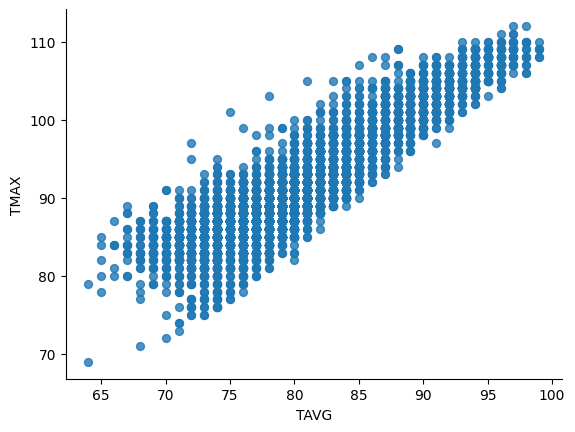

In [ ]:
# @title TAVG vs TMAX

from matplotlib import pyplot as plt
weather.plot(kind='scatter', x='TAVG', y='TMAX', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

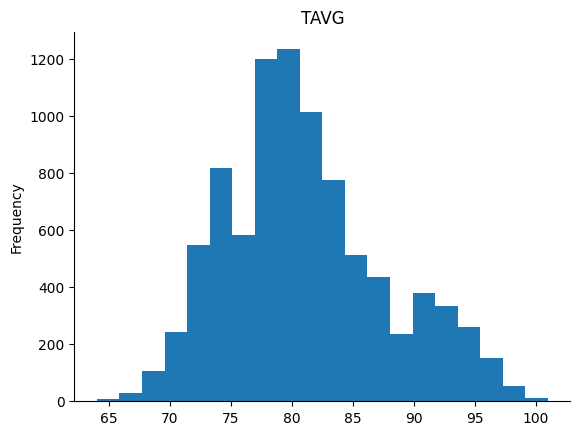

In [ ]:
# @title TAVG

from matplotlib import pyplot as plt
weather['TAVG'].plot(kind='hist', bins=20, title='TAVG')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [107]:
weather["PRCP"].value_counts()

PRCP
0.00    1760
0.08     161
0.04     154
0.01     151
0.02     149
        ... 
3.78       1
0.26       1
2.68       1
4.80       1
2.48       1
Name: count, Length: 98, dtype: int64

In [108]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.615083
TAVG       0.000000
TMAX       0.230278
TMIN       0.351524
dtype: float64

In [109]:
weather[pd.isnull(weather["PRCP"])]

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
2000-01-14,IN001080500,"BEGUMPET OBSERVATORY, IN",NaN,78,90.0,64.0
2000-01-15,IN001080500,"BEGUMPET OBSERVATORY, IN",NaN,76,91.0,NaN
2000-01-16,IN001080500,"BEGUMPET OBSERVATORY, IN",NaN,76,88.0,66.0
2000-01-17,IN001080500,"BEGUMPET OBSERVATORY, IN",NaN,76,NaN,NaN
2000-01-18,IN001080500,"BEGUMPET OBSERVATORY, IN",NaN,74,90.0,61.0
...,...,...,...,...,...,...
2024-06-01,IN001080500,"BEGUMPET OBSERVATORY, IN",NaN,95,106.0,87.0
2024-06-02,IN001080500,"BEGUMPET OBSERVATORY, IN",NaN,89,104.0,NaN
2024-06-03,IN001080500,"BEGUMPET OBSERVATORY, IN",NaN,83,105.0,74.0


In [110]:
weather["PRCP"]=weather["PRCP"].fillna(0.00)

In [111]:
weather[pd.isnull(weather["TMAX"])]

,STATION,NAME,PRCP,TAVG,TMAX,TMIN
DATE,,,,,,
2000-01-17,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,76,NaN,NaN
2000-02-01,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,75,NaN,62.0
2000-03-04,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,82,NaN,65.0
2000-03-13,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,83,NaN,67.0
2000-04-14,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,89,NaN,78.0
...,...,...,...,...,...,...
2024-06-10,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,83,NaN,76.0
2024-06-12,IN001080500,"BEGUMPET OBSERVATORY, IN",0.08,83,NaN,73.0
2024-06-13,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,83,NaN,75.0


In [112]:
weather["TMAX"].value_counts()

TMAX
89.0     551
87.0     511
90.0     502
92.0     429
85.0     424
86.0     421
88.0     392
91.0     388
93.0     287
94.0     260
83.0     202
84.0     193
96.0     191
98.0     166
103.0    163
99.0     162
95.0     161
101.0    153
97.0     147
104.0    136
102.0    127
82.0     127
100.0    123
105.0    120
106.0     94
81.0      78
107.0     77
108.0     70
109.0     49
80.0      49
79.0      31
78.0      19
110.0     18
77.0      18
76.0      14
75.0       5
111.0      3
74.0       2
112.0      2
72.0       1
71.0       1
73.0       1
69.0       1
Name: count, dtype: int64

In [113]:
weather=weather.fillna(method="ffill")

In [114]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.0
NAME       0.0
PRCP       0.0
TAVG       0.0
TMAX       0.0
TMIN       0.0
dtype: float64

In [115]:
weather.dtypes

STATION     object
NAME        object
PRCP       float64
TAVG         int64
TMAX       float64
TMIN       float64
dtype: object

In [116]:
weather.index

Index(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
       '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',
       ...
       '2024-06-08', '2024-06-09', '2024-06-10', '2024-06-11', '2024-06-12',
       '2024-06-13', '2024-06-14', '2024-06-15', '2024-06-16', '2024-06-17'],
      dtype='object', name='DATE', length=8924)

In [117]:
weather.index=pd.to_datetime(weather.index)

In [118]:
weather.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2024-06-08', '2024-06-09', '2024-06-10', '2024-06-11',
               '2024-06-12', '2024-06-13', '2024-06-14', '2024-06-15',
               '2024-06-16', '2024-06-17'],
              dtype='datetime64[ns]', name='DATE', length=8924, freq=None)

In [119]:
weather["target_tmax"]=weather.shift(-1)["TMAX"]
weather["target_tmin"]=weather.shift(-1)["TMIN"]
weather["target_tavg"]=weather.shift(-1)["TAVG"]
weather["target_prp"]=weather.shift(-1)["PRCP"]
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN,target_tmax,target_tmin,target_tavg,target_prp
DATE,,,,,,,,,,
2000-01-01,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,71,82.0,60.0,81.0,60.0,68.0,0.00
2000-01-02,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,68,81.0,60.0,83.0,60.0,67.0,0.00
2000-01-03,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,67,83.0,60.0,83.0,53.0,69.0,0.00
2000-01-04,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,69,83.0,53.0,83.0,55.0,69.0,0.00
2000-01-05,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,69,83.0,55.0,83.0,54.0,69.0,0.00
...,...,...,...,...,...,...,...,...,...,...
2024-06-13,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,83,93.0,75.0,93.0,75.0,84.0,0.43
2024-06-14,IN001080500,"BEGUMPET OBSERVATORY, IN",0.43,84,93.0,75.0,93.0,75.0,86.0,0.00
2024-06-15,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,86,93.0,75.0,94.0,79.0,87.0,0.00


In [120]:
weather=weather.iloc[:-1:].copy()
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN,target_tmax,target_tmin,target_tavg,target_prp
DATE,,,,,,,,,,
2000-01-01,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,71,82.0,60.0,81.0,60.0,68.0,0.00
2000-01-02,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,68,81.0,60.0,83.0,60.0,67.0,0.00
2000-01-03,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,67,83.0,60.0,83.0,53.0,69.0,0.00
2000-01-04,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,69,83.0,53.0,83.0,55.0,69.0,0.00
2000-01-05,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,69,83.0,55.0,83.0,54.0,69.0,0.00
...,...,...,...,...,...,...,...,...,...,...
2024-06-12,IN001080500,"BEGUMPET OBSERVATORY, IN",0.08,83,93.0,73.0,93.0,75.0,83.0,0.00
2024-06-13,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,83,93.0,75.0,93.0,75.0,84.0,0.43
2024-06-14,IN001080500,"BEGUMPET OBSERVATORY, IN",0.43,84,93.0,75.0,93.0,75.0,86.0,0.00


In [158]:
weather["monthly_avg"]=weather["TAVG"].groupby(weather.index.month).apply(lambda  x:x.expanding(1).mean()).reset_index(level=0,drop=True)

In [160]:
weather["day_avg_of_yr"]=weather["TAVG"].groupby(weather.index.dayofyear).apply(lambda  x:x.expanding(1).mean()).reset_index(level=0,drop=True)
weather

,STATION,NAME,PRCP,TAVG,TMAX,TMIN,target_tmax,target_tmin,target_tavg,target_prp,monthly_avg,day_avg_of_yr
DATE,,,,,,,,,,,,
2000-01-01,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,71,82.0,60.0,81.0,60.0,68.0,0.00,71.000000,71.00
2000-01-02,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,68,81.0,60.0,83.0,60.0,67.0,0.00,69.500000,68.00
2000-01-03,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,67,83.0,60.0,83.0,53.0,69.0,0.00,68.666667,67.00
2000-01-04,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,69,83.0,53.0,83.0,55.0,69.0,0.00,68.750000,69.00
2000-01-05,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,69,83.0,55.0,83.0,54.0,69.0,0.00,68.800000,69.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-12,IN001080500,"BEGUMPET OBSERVATORY, IN",0.08,83,93.0,73.0,93.0,75.0,83.0,0.00,84.857923,84.24
2024-06-13,IN001080500,"BEGUMPET OBSERVATORY, IN",0.00,83,93.0,75.0,93.0,75.0,84.0,0.43,84.855389,83.68
2024-06-14,IN001080500,"BEGUMPET OBSERVATORY, IN",0.43,84,93.0,75.0,93.0,75.0,86.0,0.00,84.854223,84.56


In [129]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import numpy as np

In [130]:
train_dataset = weather.sample(frac=0.6, random_state=0)
test_dataset = weather.drop(train_dataset.index)
cv_dataset=test_dataset.sample(frac=0.5,random_state=0)

In [131]:
x_train=np.array(train_dataset[["PRCP","TAVG","TMAX","TMIN","monthly_avg","day_avg_of_yr"]])
y_train=np.array(train_dataset[["target_tmax","target_tmin","target_tavg","target_prp"]])
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [132]:
x_cv=np.array(cv_dataset[["PRCP","TAVG","TMAX","TMIN","monthly_avg","day_avg_of_yr"]])
y_cv=np.array(cv_dataset[["target_tmax","target_tmin","target_tavg","target_prp"]])

In [133]:
x_train.shape
x_cv.shape

(1784, 4)

In [134]:
y_train.shape
y_cv.shape

(1784, 4)

In [137]:
model = Sequential([
    Dense(units=500,activation="relu",kernel_regularizer=regularizers.l2(0.1),input_shape=(6,)),
    Dense(units=200,activation="relu",kernel_regularizer=regularizers.l2(0.01)),
    Dense(units=100,activation="relu",kernel_regularizer=regularizers.l2(0.01)),
    Dense(units=40,activation="relu",kernel_regularizer=regularizers.l2(0.01)),
    Dense(units=4,activation="relu",kernel_regularizer=regularizers.l2(0.01)),
])

In [138]:
model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.0005))

In [141]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/200
168/168 [==============================] - 1s 4ms/step - loss: 5.3854
Epoch 2/200
168/168 [==============================] - 1s 4ms/step - loss: 5.2142
Epoch 3/200
168/168 [==============================] - 1s 4ms/step - loss: 5.0809
Epoch 4/200
168/168 [==============================] - 1s 4ms/step - loss: 5.0604
Epoch 5/200
168/168 [==============================] - 1s 5ms/step - loss: 4.9981
Epoch 6/200
168/168 [==============================] - 1s 5ms/step - loss: 5.0099
Epoch 7/200
168/168 [==============================] - 1s 4ms/step - loss: 4.8623
Epoch 8/200
168/168 [==============================] - 1s 5ms/step - loss: 4.9729
Epoch 9/200
168/168 [==============================] - 1s 4ms/step - loss: 5.1469
Epoch 10/200
168/168 [==============================] - 1s 4ms/step - loss: 5.0975
Epoch 11/200
168/168 [==============================] - 1s 5ms/step - loss: 5.1065
Epoch 12/200
168/168 [==============================] - 1s 4ms/step - loss: 4.8303
Epoch 13/200


In [142]:
x_cv=scaler.transform(x_cv)
predictions = model.predict(x_cv)
predictions.shape


56/56 [==============================] - 0s 2ms/step


(1784, 4)

In [143]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [144]:
y_cv.shape

(1784, 4)

In [145]:
mse = mean_squared_error(np.array(y_cv),np.array(predictions))
mse

4.242981485068141

In [146]:
mse1=mean_squared_error(np.array(y_train),model.predict(x_train))
mse1

168/168 [==============================] - 0s 2ms/step


4.093524145939075

In [147]:
x_test=np.array(test_dataset[["PRCP","TAVG","TMAX","TMIN"]])
y_test=np.array(test_dataset[["target_tmax","target_tmin","target_tavg","target_prp"]])

In [148]:
y_test

array([[8.1e+01, 6.0e+01, 6.8e+01, 0.0e+00],
       [8.3e+01, 5.3e+01, 6.9e+01, 0.0e+00],
       [8.3e+01, 5.5e+01, 6.9e+01, 0.0e+00],
       ...,
       [9.3e+01, 7.3e+01, 8.3e+01, 8.0e-02],
       [9.3e+01, 7.5e+01, 8.3e+01, 0.0e+00],
       [9.3e+01, 7.5e+01, 8.6e+01, 0.0e+00]])

In [149]:
x_test=scaler.transform(x_test)
y_pred=model.predict(x_test)
y_pred

112/112 [==============================] - 0s 2ms/step


array([[82.394615, 59.79619 , 71.53623 ,  0.      ],
       [81.59062 , 58.525925, 69.14084 ,  0.      ],
       [83.01685 , 53.581707, 69.60673 ,  0.      ],
       ...,
       [92.234474, 74.42495 , 81.35625 ,  0.      ],
       [93.465546, 73.42468 , 83.59714 ,  0.      ],
       [93.5822  , 75.7574  , 84.84934 ,  0.      ]], dtype=float32)

In [150]:
mse2=mean_squared_error(np.array(y_test),y_pred)
mse2

4.158976998992675

In [154]:
y_test_df=pd.DataFrame(y_test)
y_test_df.columns=["target_tmax","target_tmin","target_tavg","target_prp"]
y_test_df
combined =pd.concat([y_test_df,pd.DataFrame(y_pred)],axis=1)
combined

,target_tmax,target_tmin,target_tavg,target_prp,0,1,2,3
0,81.0,60.0,68.0,0.00,82.394615,59.796188,71.536232,0.0
1,83.0,53.0,69.0,0.00,81.590622,58.525925,69.140839,0.0
2,83.0,55.0,69.0,0.00,83.016853,53.581707,69.606728,0.0
3,82.0,53.0,68.0,0.00,82.940849,54.388039,69.676727,0.0
4,86.0,61.0,75.0,0.00,86.017738,56.829510,73.165543,0.0
...,...,...,...,...,...,...,...,...
3564,91.0,76.0,83.0,0.00,90.958511,75.048187,82.262390,0.0
3565,93.0,76.0,80.0,0.02,91.843391,75.385757,83.495720,0.0
3566,93.0,73.0,83.0,0.08,92.234474,74.424950,81.356247,0.0
3567,93.0,75.0,83.0,0.00,93.465546,73.424683,83.597137,0.0


<Axes: >

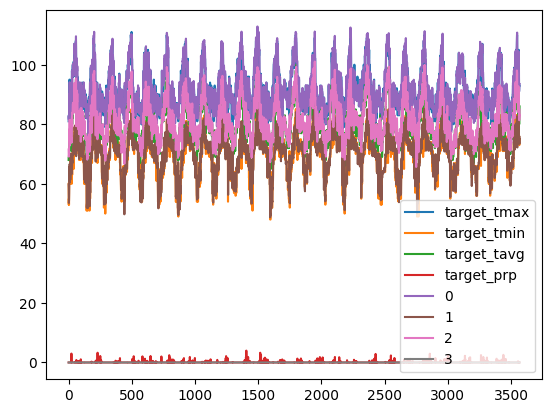

In [156]:
combined.plot( )